# Titanic Data Science Solutions
## Workflow stage

For this project, I would like to follow the workflow below.

1. Question or problem definition
2. Acquire training and testing data
3. Wrangle, prepare, cleanse the data
4. Analyze, identify patterns, and explore the data
5. Model, predict and solve the problem
6. Visualize, report, and present the problem solving steps and final solution
7. Supply or submit the results.

## Question or problem definition
> Knowing from a training set of smaples listing passengers who survied or did not survie the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survied or not.


We may also want to develop some early understanding about the domain of our problem. Here are the highlights to note.
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwrek led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involving in surviving the sinking, some groups of people were more likely to survie than others, such as women, children, and the upper class.

## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal

**Correlation.** One can approach the problem based on availavle features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? At the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

**Completing** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly inaccurate values within features and try to correct these values or exclude the samples containing errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.



## Acquire training and test data

In [89]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random
import math
from scipy.stats import pearsonr

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [90]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [91]:
# Check which features are available
print(f"We have {len(train_df.columns)} features including \"Survied\" itself")
print(train_df.columns.values)

We have 12 features including "Survied" itself
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


We can mainly divide into two types, Categorical and Numerical.

- Categorical : Survied, Pclass, sex, Embarked
- Numerical : Age, Sibsp, Parch, Fare

- Unique Value: PassengerId, Name, Ticket

In [92]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_df.info()   
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [94]:
def null_val_summary(df):
    for column in df.columns:
        if df[column].isna().sum() != 0:
            print(f"{column}  {df[column].isna().sum()}/{df.shape[0]} ~ {round(df[column].isna().sum() / df.shape[0],2) * 100} %" )
null_val_summary(train_df)
print('-' * 40)
null_val_summary(test_df)

Age  177/891 ~ 20.0 %
Cabin  687/891 ~ 77.0 %
Embarked  2/891 ~ 0.0 %
----------------------------------------
Age  86/418 ~ 21.0 %
Fare  1/418 ~ 0.0 %
Cabin  327/418 ~ 78.0 %


In [95]:
# distribution of numerical feature
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Assumption based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions

**Correlating.** 
We want to know how well does each feature correlate with Survival.

**Completing.**
1. We may want to complete Age feature as it is definitely correlated to survival
2. We may want to complete the embarked feature as it may also correlate survival or another important feature

**Correcting.**
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates(22%) and there may not be a correlation
2. Cabin feature may be dropped as it is highly incomplete
3. PassengerID may be dropped from training dataset as it does not contribute to survival
4. Name may be dropped from training dataset as it does not contribute to survival

**Creating.**
1. We may want to create a new feature called Family based on Parch and Sibsp to get total count of family members on board
2. We may want to engineer the name feature to extract title as a new feature
3. We may want to create new feature for age bands, This turns a continuous numerical feature into an ordinal cat feature
4. We may also want to create a fare range feature if it helps our analysis

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.
1. Women (sex = female) were more likely to have survived.
2. Children were more likely to have survied
3. The uppder class passengers (Pclass = 1) were more likely to have survived.




## Analyze by pivoting features

To confim some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. we can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are catoegorical (sex), Ordinal(Pclass), or discrete (Sibsp, Parch) type

- **Pclass** We observe significant correlation (>0.5) among Pclass = 1 and Survived (classifying #3). We decided to include this feature in our model.
- **sex** We confirm the observation during problem definition that Sex = Femal had very high survival rate at 74%
- **sibSP and parch** These features have zero coorelation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1)

In [97]:
train_df['Pclass'].value_counts(normalize= True)
# a = train_df.groupby(by = 'Pclass').mean()['Survived'].to_frame()
a = train_df[['Pclass', 'Survived']].groupby(by = 'Pclass', as_index = False).mean()
data1 = list(a.index)
data2 = a['Survived'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.994


In [98]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [99]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data

### Correlating numerical features
Let us start by understanding correlatins between numerical featues and our solution goal (Survived)

A histogram chart is useful for analyzing continuous numerical variables like Age where bending or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands

Note that x-axis in histogram visualizations represents the count of samples or passengers.

### Observations

- Infants (Age = 4) had high survival rate.
- Oldest passengers (Age = 80) survived
- Large number of 15 - 25 year olds did not survive
- Most passengers are in 15 - 35 age range.

### Decisions.

The simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age in our model training
- Complete the age feature for null values 
- We should band age groups



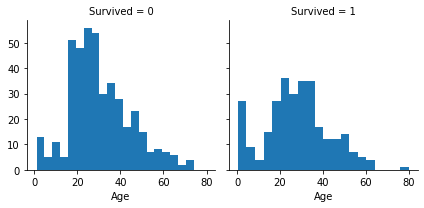

In [100]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot.
This can be done with numerical and categorical features which have numeric values

#### Observations.
- Pclass = 3 had most passengers, however most did not survive. Confirms our classifying assumption #2
- Infant passengers in Pclass = 2 and Pclass = 3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass =1 survived. Confirms our classifying assumption #3
- Pclass varies in terms of Age distribution of passengers

#### Decisions.
- Consider Pclass for model training

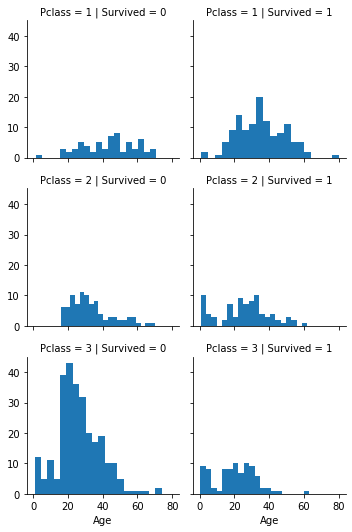

In [101]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2.5)#, height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', bins = 20)


### Correlating categorical features

Now we can correlate categorical features with our solution goal.

#### Observations.

- Female passengers had much better survival rate than males. 
- Exception in Embarked = C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass = 3 when compared with Pclass = 2 for C and Q prots. 
- Ports of embarkation have varying survival rates for Pclass = 3 and among male passengers. 

#### Decisions.

- Add Sex feature to model training
- Complete and add Embarked feature to model training


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


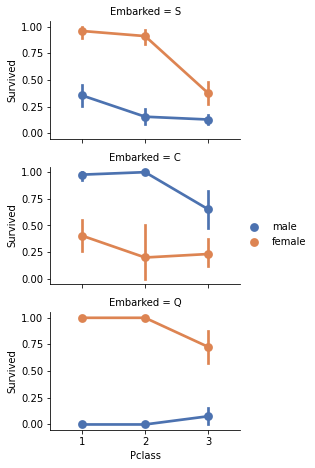

In [102]:
grid = sns.FacetGrid(train_df, row = "Embarked", size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

### Correlating categorical and numerical features

We may also want to correlate categorical features and numerical features. we can consider correlating emarked, sex, fare with survied

#### Observation
- Higher fare paying passengers had better survival. Confrims our assumption for creating fare ranges.
- Port of embarkation correlates with survival rates.

#### Decisions.
- Consider banding Fare Feature


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


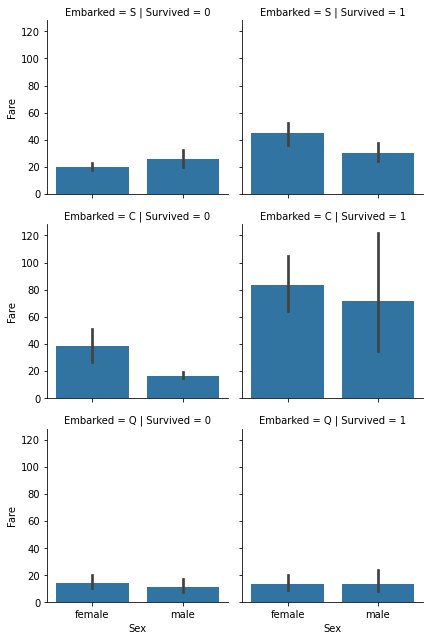

In [103]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

## Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. 
So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating and completing goals.

### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook as eases the analysis.

Based on our assumptions and decisions we want to drop the cabin and Ticket features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [104]:
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin'], axis = 1)
combine = [train_df, test_df]

#### Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract tutkes and test correlation between titles and survival, before dropping Name and PassengerID features.

In the following code we extract Title feature using regular expressios. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand = False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For Example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jokheer).

**Decision**

- We decide to retain the new Title feature for model training


In [105]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`

In [106]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Miss')

train_df[['Title','Survived']].groupby(by = 'Title').mean().sort_values(by = 'Survived', ascending= False)

,Survived
Title,
Mrs,0.792000
Miss,0.704301
Master,0.575000
Rare,0.347826
Mr,0.156673


We can convert the categorical titles to ordinal

In [107]:
title_mapping = {'Mr' : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()
# Is this the right thing to do? shouldn't we maybe pick the order by the smallest survied to lartget survied
# perhaps Mrs : 5 Miss " 4 Master : 3 Rare : 2 Mr : 1"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerID feature in the training dataset

In [108]:
train_df = train_df.drop(['Name','PassengerId'], axis = 1)
test_df = test_df.drop('Name', axis = 1)
combine = [train_df, test_df]


### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in acheiving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female = 1 and male = .

In [109]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuos feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.
We can consider three methods to complete a numerical continuous feature.

1. A simple way to generate random number between mean and standard deviation
2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 

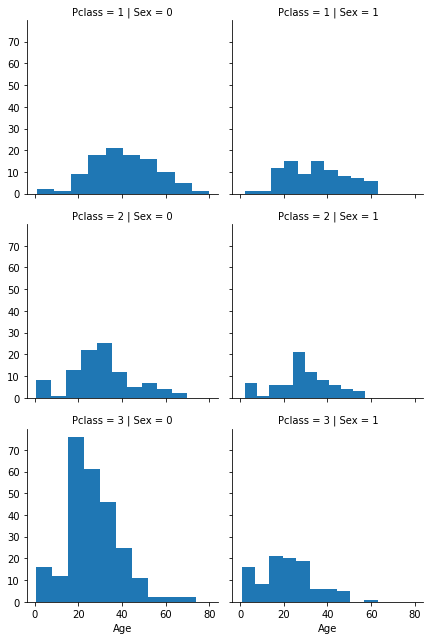

In [110]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender Combinations.

In [111]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex(0 or 1) and Pclass(1,2,3) to calculate guessed values of Age for the six combinations.

In [112]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):

            guess_df = dataset[(dataset['Sex'] == i) & \
                                (dataset['Pclass'] == j + 1)]['Age'].dropna()
            
            age_guess = guess_df.median()

            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                        'Age'] = guess_ages[i,j] 

    dataset['Age'] = dataset['Age'].astype(int)


train_df.head()





,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with survived.

In [113]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [114]:
for dataset in combine:
    dataset['Age'] =  dataset['Age'].apply(lambda x: 0 if x<= 16 else x)
    dataset['Age'] =  dataset['Age'].apply(lambda x: 1 if x> 16 and x <= 32 else x)
    dataset['Age'] =  dataset['Age'].apply(lambda x: 2 if x > 32 and x<= 48 else x)
    dataset['Age'] =  dataset['Age'].apply(lambda x: 3 if x > 48 and x <= 64 else x)
    dataset['Age'] =  dataset['Age'].apply(lambda x: 4 if x >64  else x)
    # dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [115]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets

In [116]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize','Survived']].groupby(by = 'FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [117]:
for dataset in combine:
    dataset['IsAlone'] = 0
    #dataset['IsAlone'] = dataset.apply(lambda x: 1 if x.FamilySize == 1 else 0, axis =1)
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone','Survived']].groupby(by = 'IsAlone', as_index= False).mean()



,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop unnecessary columns

In [118]:
# for dataset in combine:
#     dataset = dataset.drop(['SibSp','Parch','FamilySize'], axis = 1)

train_df = train_df.drop(['SibSp','Parch','FamilySize'], axis = 1)
test_df = test_df.drop(['SibSp','Parch','FamilySize'], axis = 1)

combine = [train_df,test_df]
train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [119]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

### Completing a categorical feature

In [120]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port


'S'

In [121]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [122]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S' :0,'C' : 1, 'Q' : 2})

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [123]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int64  
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Em

In [124]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)

In [125]:
#train_df['Fare_bin'] = pd.cut(train_df['Fare'],5)
train_df['Fare_bin'] = pd.qcut(train_df['Fare'],4)
train_df[['Fare_bin','Survived']].groupby(by = 'Fare_bin').mean()

,Survived
Fare_bin,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [126]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop('Fare_bin', axis = 1)
combine = [train_df, test_df]




In [127]:
test_df['Title'] = test_df['Title'].astype(int)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


## Model, Predict and solve

- Logistic Regression
- K-Nearest Neighbors
- Random Forrest
- Perceptron

(+ Add reason for the selection)


In [128]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [129]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100 ,2)
acc_log

81.37

In [130]:
#Instatitate the result 
Accuracy_full = np.zeros(10)
Accuracy_kf = np.zeros(10)

cv = KFold(n_splits = 10, random_state = 10, shuffle = True)
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Accuracy_full = round(logreg.score(X_train, Y_train) * 100 ,2)

logreg = LogisticRegression()
Accuracy_kf = round(cross_val_score(logreg, X_train,Y_train, cv = cv).mean() * 100,2)

print(Accuracy_full)
print(Accuracy_kf)

# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

81.37
80.92


In [156]:

# Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

# param_grid = [
#     # {'classifier' : [LogisticRegression()],
#     #  'classifier__penalty' : ['l1', 'l2'],
#     # # 'classifier__C' : np.logspace(-4, 4, 20),
#     # 'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(1,100,1))}
#     # 'classifier__max_features' : list(range(6,32,5))}
# ]

# Create grid search object
rf = RandomForestClassifier()
parameters = {'n_estimators':range(10,300,10)}
rf.fit(X_train, Y_train)

# print(rf.best_score_)
# print(rf.best_estimator_)
print(rf.score(X_train, Y_train))

rf = RandomForestClassifier()
gs = GridSearchCV(rf,parameters, cv = 5 )
gs.fit(X_train,Y_train)
print(gs.best_score_)
print(gs.best_estimator_)
# clf = GridSearchCV(param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

# best_clf = clf.fit(X_train, Y_train)

# parameters = {'n_estimators':range(10,300,10)}

0.8664421997755332
